# Simple Chatbot with LangGraph ang GROQ gemma2-9b-it LLM
* Notebook by Adam Lang
* Date: 1/15/2025

# Overview
* In this notebook I will implement a simple chatbot agent using LangGraph and the GROQ developer API using the `gemma2-ib-it` open-source llm model.

# Architecture
* Note: All boxes are considered "nodes" in LangGraph.
* Moving from one node to another is "State Management".

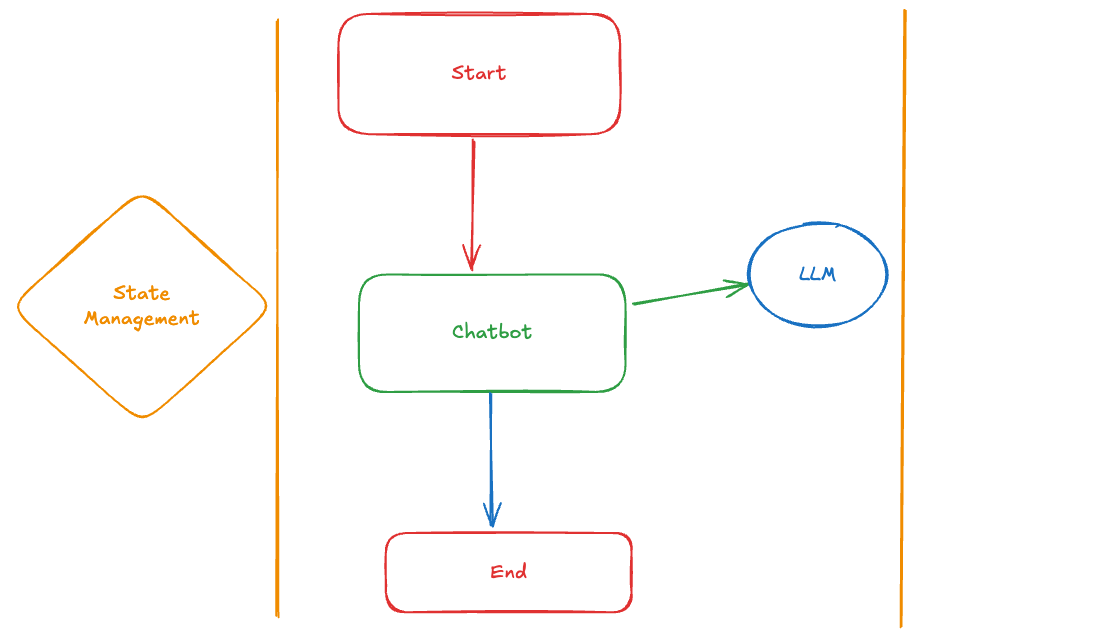

# Install Dependencies

In [1]:
%%capture
!pip install langgraph langsmith langchain langchain_groq langchain_community

# API keys and Environment Variables

In [2]:
## imports -- run this cell if you
## don't have your key stored in a secrets or .env file
from getpass import getpass

GROQ_API_KEY = getpass("Enter your GROQ API key: ")

Enter your GROQ API key: ··········


In [3]:
LANGSMITH_API_KEY = getpass("Enter your LANGSMITH API KEY: ")

Enter your LANGSMITH API KEY: ··········


In [4]:
## Setup env requirements
import os

os.environ['GROQ_API_KEY'] = 'GROQ_API_KEY'
os.environ['LANGCHAIN_API_KEY'] = 'LANGSMITH_API_KEY'
os.environ['LANGCHAIN_TRACING'] = "true"
os.environ['LANGCHAIN_PROJECT'] = 'LangGraphChatbot'


# Setup LLM

In [5]:
## import groq
from langchain_groq import ChatGroq

## setup ChatGroq
llm=ChatGroq(groq_api_key=GROQ_API_KEY, model_name='gemma2-9b-it')
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x784da7e505d0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x784db4551050>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Build Chatbot with LangGraph
* We need to import from langgraph:
1. `StateGraph` - state management of the graph.
2. `START`, `END` - start and end nodes
3. `add_messages` - state management of messages

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
## langraph imports
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.callbacks import StdOutCallbackHandler
from langchain.schema import HumanMessage
#from langgraph.graph import State, GraphBuilder

1. State Class

In [7]:
## create State class
class State(TypedDict):
  # Messages have type "list".
  ## `add_messages` function in annotation defines how state key is updated
  ## (in this case it appends messages to a list, not overwriting them)
  messages:Annotated[list, add_messages]

## init StateGraph
graph_builder=StateGraph(State)

In [8]:
## lets see the graph_builder
graph_builder

2. Chatbot node

In [9]:
## create chatbot node
def chatbot(state:State):
  """Inherits State class & Invokes messages by users"""
  return {"messages":llm.invoke(state['messages'])}

3. Add Chatbot node to graph

In [10]:
## add node to graph
graph_builder.add_node("chatbot", chatbot)
graph_builder

3. Add START and END edges to graph

In [11]:
## start and end edges
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

4. Compile Graph

In [12]:
## compile graph
graph=graph_builder.compile()

5. Display Graph

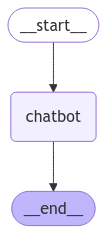

In [13]:
## display graph
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

# Test Chatbot

In [14]:
## using a while loop
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit", "q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages': ("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages']) ## value of messages
      print("Assistant:",value["messages"].content) ## llm response

User: hello how are you


dict_values([{'messages': AIMessage(content="I'm doing well, thank you! As an AI, I don't have feelings, but I'm ready to assist you with any questions or tasks you may have.\n\nHow are you doing today?\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 13, 'total_tokens': 60, 'completion_time': 0.085454545, 'prompt_time': 0.000161209, 'queue_time': 0.036445477999999996, 'total_time': 0.085615754}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-ef55eb5e-314d-4b68-bb27-8a20be444010-0', usage_metadata={'input_tokens': 13, 'output_tokens': 47, 'total_tokens': 60})}])
content="I'm doing well, thank you! As an AI, I don't have feelings, but I'm ready to assist you with any questions or tasks you may have.\n\nHow are you doing today?\n" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 13, 'total_tokens': 60, 'completion

User: where is vail


dict_values([{'messages': AIMessage(content='Vail is located in **Eagle County, Colorado, in the United States**. \n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 13, 'total_tokens': 33, 'completion_time': 0.036363636, 'prompt_time': 8.304e-05, 'queue_time': 0.021178848, 'total_time': 0.036446676}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-b1f7c46c-572f-454f-96bd-c57550f0e42d-0', usage_metadata={'input_tokens': 13, 'output_tokens': 20, 'total_tokens': 33})}])
content='Vail is located in **Eagle County, Colorado, in the United States**. \n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 13, 'total_tokens': 33, 'completion_time': 0.036363636, 'prompt_time': 8.304e-05, 'queue_time': 0.021178848, 'total_time': 0.036446676}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason':

User: what is generative ai


dict_values([{'messages': AIMessage(content="Generative AI is a type of artificial intelligence that focuses on creating new content, rather than simply analyzing or classifying existing data. \n\nHere's a breakdown:\n\n**What it does:**\n\n* **Generates new data:** This can include text, images, audio, video, code, 3D models, and more.\n* **Learns patterns:** Generative AI models are trained on massive datasets, learning the underlying patterns and structures within that data.\n* **Creates variations:** Using this learned knowledge, it can generate new content that resembles the training data but is not an exact copy.\n\n**How it works:**\n\n* **Deep learning:** Most generative AI models are based on deep learning algorithms, particularly neural networks with many layers.\n* **Probability and distribution:** These networks learn the probability distribution of the data they are trained on. This means they understand the likelihood of certain elements appearing together and in what ord

User: what is bronchitis


dict_values([{'messages': AIMessage(content="Bronchitis is an inflammation of the bronchial tubes, the airways that carry air to and from your lungs. \n\nHere's a breakdown:\n\n**Types:**\n\n* **Acute bronchitis:** This is the most common type, often caused by a viral infection like the common cold or flu. Symptoms usually last for a few days to a couple of weeks.\n* **Chronic bronchitis:** This type is long-term (lasting for at least three months in a year, for two years in a row). It's often caused by smoking and leads to a persistent cough with mucus.\n\n**Symptoms:**\n\n* **Cough:** This is the primary symptom, often producing mucus (phlegm) that can be clear, white, yellow, or green.\n* **Shortness of breath:**  You may find it harder to breathe, especially during physical activity.\n* **Wheezing:** A whistling sound when you breathe.\n* **Sore throat**\n* **Chest discomfort or tightness**\n* **Fatigue**\n* **Runny nose**\n* **Low-grade fever**\n\n**Causes:**\n\n* **Viruses:** Mos

User: q
Good Bye
